In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV
df = pd.read_csv("C:/Proyecto_Final/DataSetLimpio_Ajustado.csv")

# Verifica las primeras filas del DataFrame para asegurarte de que se cargó correctamente
print(df.head())

             Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  2018-01-01 00:00:00           380.047791          5.311336   
1  2018-01-01 00:10:00           453.769196          5.672167   
2  2018-01-01 00:20:00           306.376587          5.216037   
3  2018-01-01 00:30:00           419.645905          5.659674   
4  2018-01-01 00:40:00           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)        time_diff  
0                     416.328908          259.994904              NaN  
1                     519.917511          268.641113  0 days 00:10:00  
2                     390.900016          272.564789  0 days 00:10:00  
3                     516.127569          271.258087  0 days 00:10:00  
4                     491.702972          265.674286  0 days 00:10:00  


In [3]:
# Realizar el Análisis Exploratorio de Datos (EDA):
# Estadísticas Descriptivas
print(df.describe())

       LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count         50530.000000      50530.000000                   50530.000000   
mean           1307.684332          7.557952                    1492.175463   
std            1312.459242          4.227166                    1368.018238   
min              -2.471405          0.000000                       0.000000   
25%              50.677890          4.201395                     161.328167   
50%             825.838074          7.104594                    1063.776283   
75%            2482.507568         10.300020                    2964.972462   
max            3618.732910         25.206011                    3600.000000   

       Wind Direction (°)  
count        50530.000000  
mean           123.687559  
std             93.443736  
min              0.000000  
25%             49.315437  
50%             73.712978  
75%            201.696720  
max            359.997589  


In [4]:
# Asegurarse de que la columna de fecha esté en formato datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Número de filas por día (10 minutos x 144 = 24 horas)
rows_per_day = 144

# Agrupar cada 144 filas (un día) y calcular la media de las columnas numéricas
daily_avg = df.groupby(df.index // rows_per_day).mean(numeric_only=True)

# Tomar la primera fecha de cada grupo como índice representativo
daily_avg['Fecha'] = df.groupby(df.index // rows_per_day)['Date/Time'].first().values
daily_avg.set_index('Fecha', inplace=True)

# Mostrar resultado
print(daily_avg.head())


            LV ActivePower (kW)  Wind Speed (m/s)  \
Fecha                                               
2018-01-01          1535.204483          8.022975   
2018-01-02          3182.564250         12.000548   
2018-01-03          1017.793340          6.650189   
2018-01-04           834.486869          6.232531   
2018-01-05           123.717345          3.121434   

            Theoretical_Power_Curve (KWh)  Wind Direction (°)  
Fecha                                                          
2018-01-01                    1622.990048          229.735242  
2018-01-02                    3314.693471          197.859789  
2018-01-03                    1072.956361          192.476045  
2018-01-04                     838.463088          121.299142  
2018-01-05                     130.342291          154.906666  


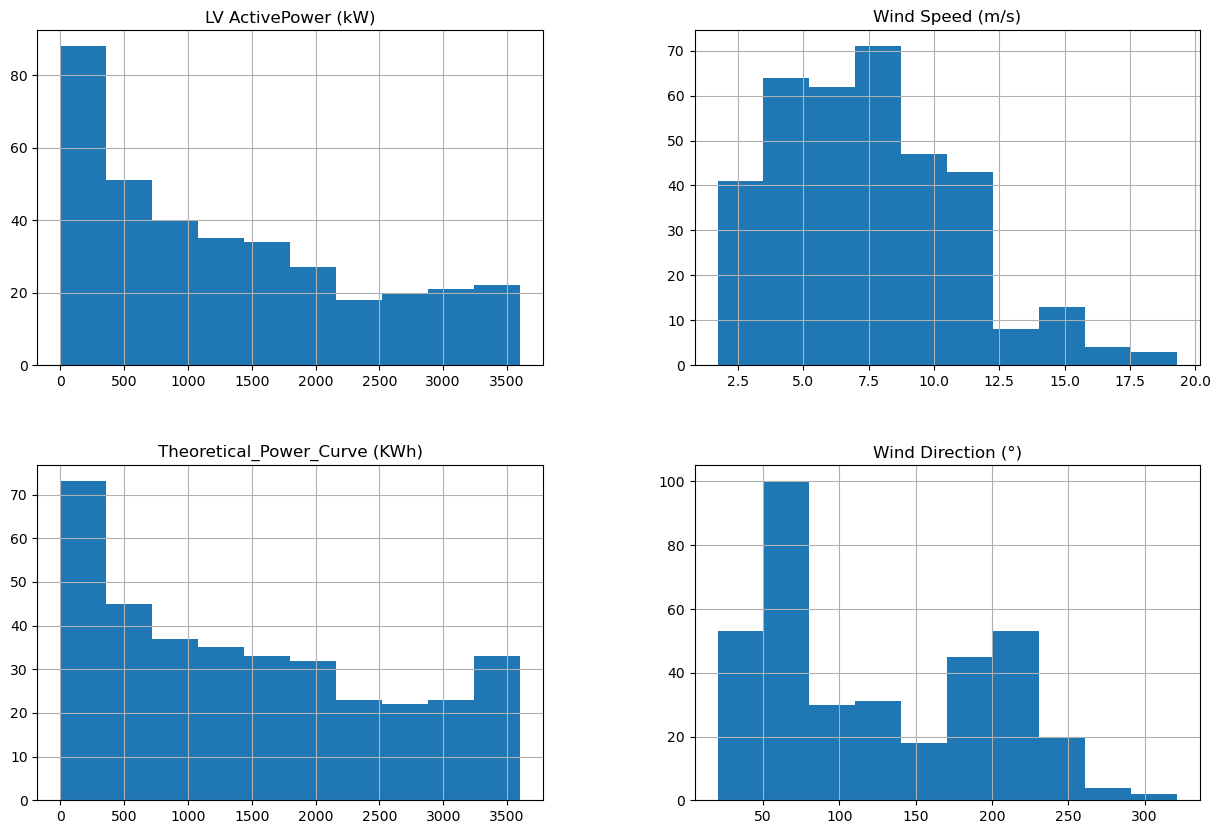

In [6]:
# Histogramas
daily_avg.hist(figsize=(15, 10))
plt.show()

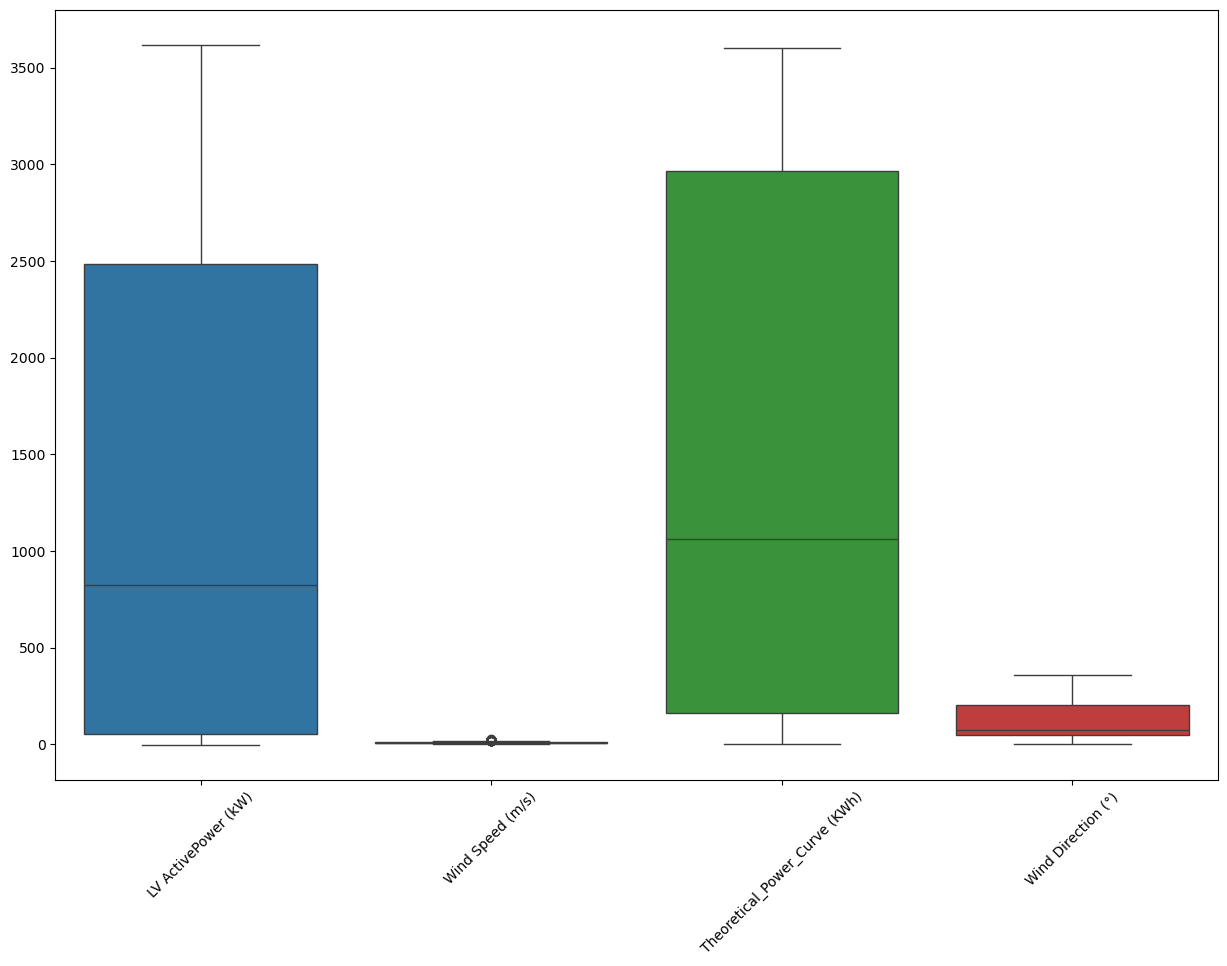

In [7]:
# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

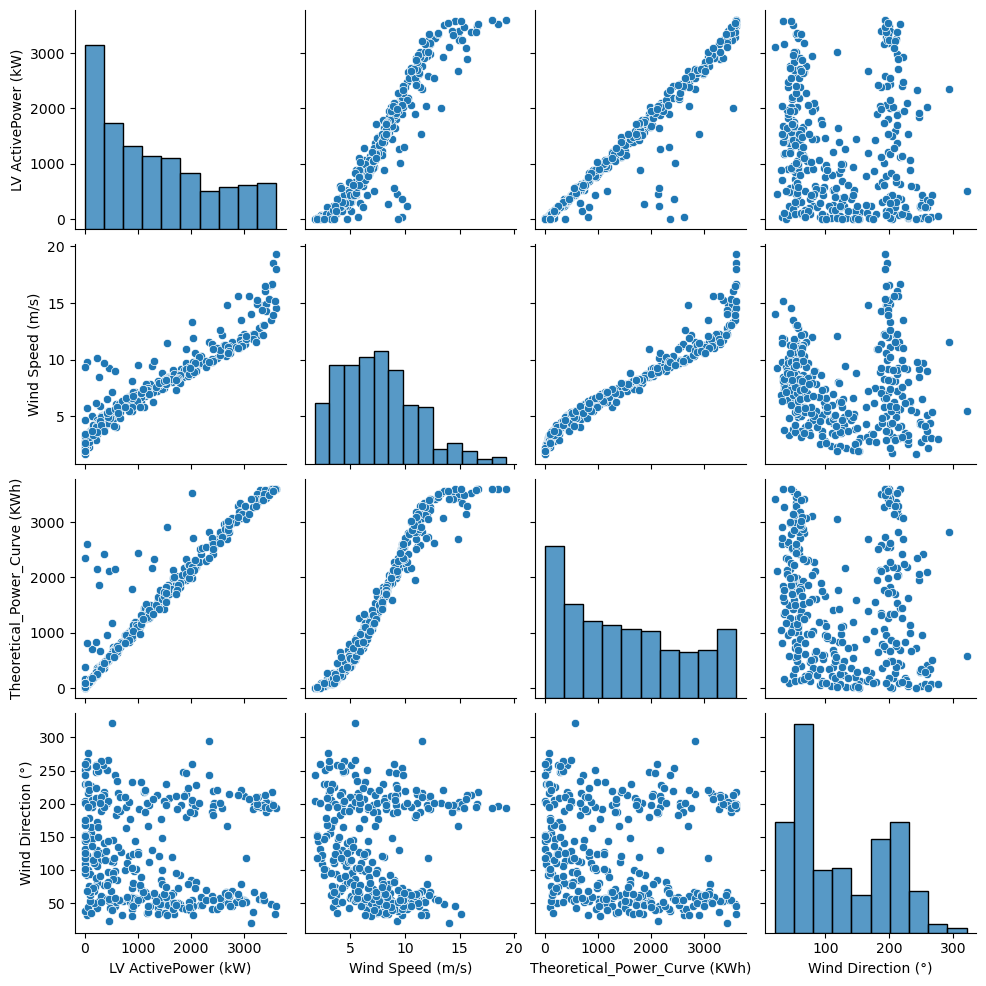

In [8]:
# Diagramas de dispersión (Scatter plots)
sns.pairplot(daily_avg)
plt.show()

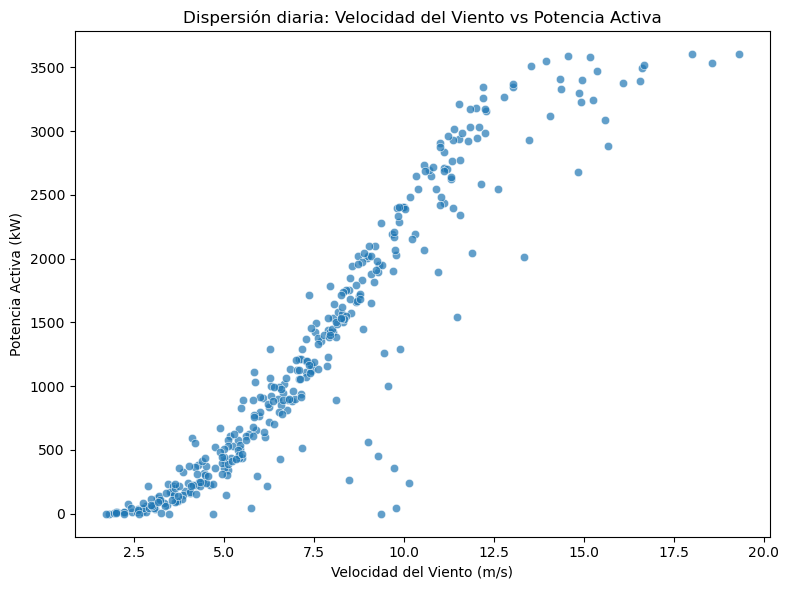

In [9]:
# --- 3. Dispersión suavizada ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=daily_avg, x='Wind Speed (m/s)', y='LV ActivePower (kW)', alpha=0.7)
plt.title("Dispersión diaria: Velocidad del Viento vs Potencia Activa")
plt.xlabel("Velocidad del Viento (m/s)")
plt.ylabel("Potencia Activa (kW)")
plt.tight_layout()
plt.show()

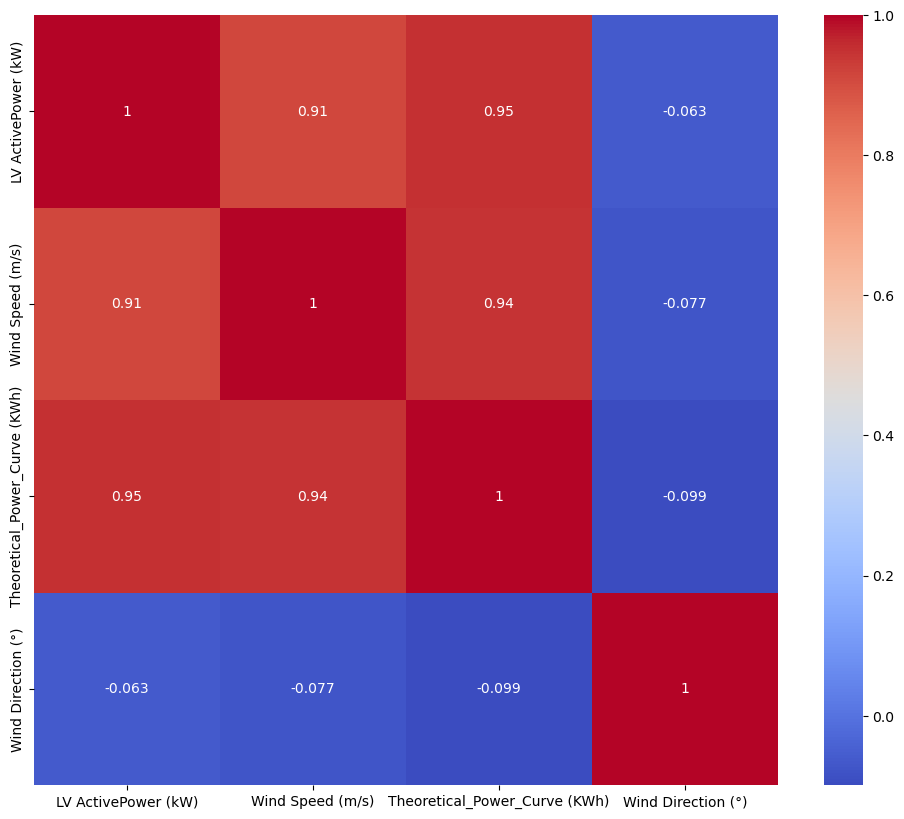

In [10]:
# Análisis de Correlación
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()